# Markov Chain Transition Matrix
Here we illustrate the convergence of a Markov chain to its stationary distribution. To make the example more concrete, let's pretend we're out for a stroll around the Engineering quad


<img src="map.png" alt="drawing" width="700"/>



In [1]:
import networkx as nx
import torch
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.size']=22
mpl.rcParams["font.family"] = "Times New Roman"
mpl.rcParams["mathtext.fontset"] = "stix"
mpl.rcParams["figure.dpi"] = 150

tensor([[0.0000, 0.2500, 0.5000, 0.0000, 0.0000, 0.0000],
        [0.3000, 0.0000, 0.2000, 0.5000, 0.0000, 0.0000],
        [0.7000, 0.1500, 0.0000, 0.2000, 0.1500, 0.0000],
        [0.0000, 0.6000, 0.1000, 0.0000, 0.0000, 0.5000],
        [0.0000, 0.0000, 0.2000, 0.0000, 0.0000, 0.5000],
        [0.0000, 0.0000, 0.0000, 0.3000, 0.8500, 0.0000]]) ['Hutchison', 'Carlson', 'Hylan', 'CSB', 'Wegmans', 'Goergen']
\begin{pmatrix}
	0 & 0.25 & 0.5 & 0 & 0 & 0 \\
	0.3 & 0 & 0.2 & 0.5 & 0 & 0 \\
	0.7 & 0.15 & 0 & 0.2 & 0.15 & 0 \\
	0 & 0.6 & 0.1 & 0 & 0 & 0.5 \\
	0 & 0 & 0.2 & 0 & 0 & 0.5 \\
	0 & 0 & 0 & 0.3 & 0.85 & 0 \\
\end{pmatrix}


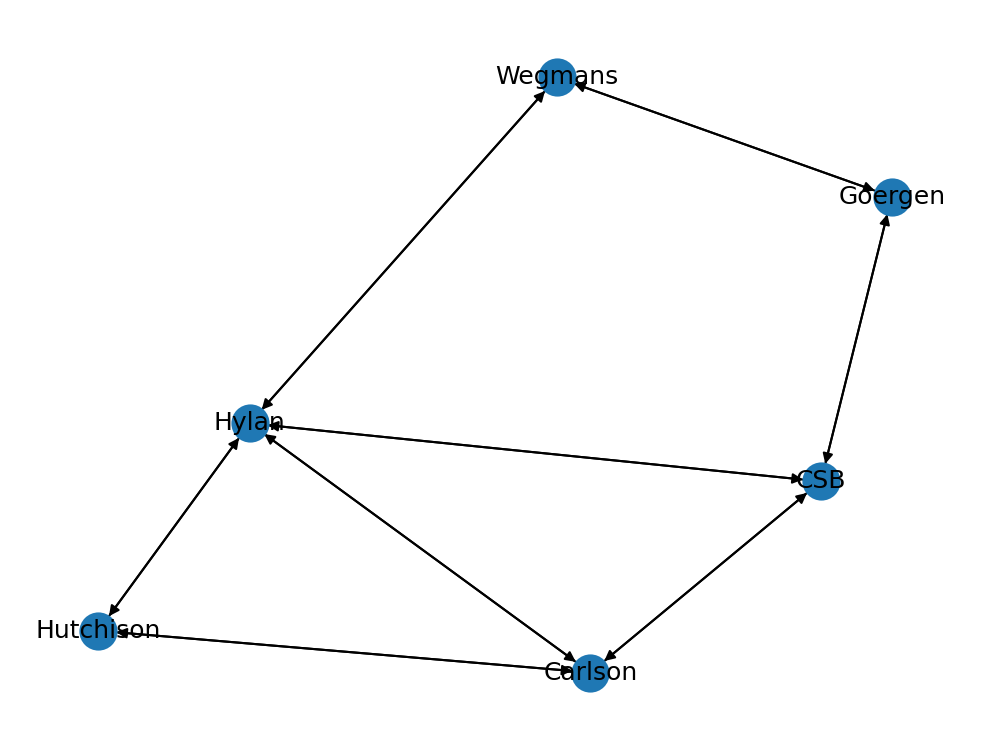

In [2]:

edges = [
    ("Hutchison", "Carlson", 0.3),
    ("Hutchison", "Hylan", 0.7),
    ("Hylan", "Hutchison", 0.5),
    ("Hylan", "Carlson", 0.2),
    ("Hylan", "CSB", 0.1),
    ("Hylan", "Wegmans", 0.2),
    ("Carlson", "Hutchison", 0.25),
    ("Carlson", "Hylan", 0.15),
    ("Carlson", "CSB", 0.6),
    ("CSB", "Carlson", 0.5),
    ("CSB", "Hylan", 0.2),
    ("CSB", "Goergen", 0.3),
    ("Wegmans", "Goergen", 0.85),
    ("Wegmans", "Hylan", 0.15),
    ("Goergen", "CSB", 0.5),
    ("Goergen", "Wegmans", 0.5),
]
G = nx.DiGraph()
G.add_weighted_edges_from(edges)

labels = nx.get_edge_attributes(G,'weight')
pos = nx.spring_layout(G)
nx.draw(G, with_labels=True)
# nx.draw_networkx_edge_labels(G, pos,edge_labels=labels)
N = G.number_of_nodes()
P = torch.Tensor(nx.adjacency_matrix(G, nodelist=G.nodes()).toarray()).T
print(P, G.nodes())

valstr = "\\begin{pmatrix}\n"
for Ti in P:
    valstr += "\t"
    for j in Ti[:-1]:
        valstr += "{:.2g} & ".format(float(j))
    valstr += "{:.2g} \\\\\n".format(float(Ti[-1]))
valstr += "\\end{pmatrix}"
print(valstr)

In [3]:
mu = torch.rand(N)
mu /= mu.sum()
for i in range(10000):
    mu = P @ mu
    print(mu)
mu_stationary = mu.clone().detach()
mu = torch.rand(N)
mu /= mu.sum()
def kl_divergence(mu1: torch.Tensor, mu2: torch.Tensor):
    return float((mu1 * (mu1/mu2).log()).sum())
divergences = []
for i in range(50):
    mu = P @ mu
    divergences.append(kl_divergence(mu, mu_stationary))


tensor([0.0434, 0.1645, 0.3627, 0.0619, 0.0361, 0.3314])
tensor([0.2225, 0.1165, 0.0729, 0.3007, 0.2382, 0.0492])
tensor([0.0656, 0.2316, 0.2691, 0.1018, 0.0392, 0.2927])
tensor([0.1925, 0.1244, 0.1069, 0.3123, 0.2002, 0.0639])
tensor([0.0845, 0.2352, 0.2459, 0.1172, 0.0533, 0.2638])
tensor([0.1817, 0.1332, 0.1259, 0.2976, 0.1811, 0.0805])
tensor([0.0962, 0.2285, 0.2339, 0.1327, 0.0654, 0.2432])
tensor([0.1741, 0.1420, 0.1380, 0.2821, 0.1684, 0.0954])
tensor([0.1045, 0.2209, 0.2248, 0.1467, 0.0753, 0.2278])
tensor([0.1676, 0.1497, 0.1469, 0.2689, 0.1588, 0.1080])
tensor([0.1109, 0.2141, 0.2174, 0.1585, 0.0834, 0.2157])
tensor([0.1622, 0.1560, 0.1539, 0.2581, 0.1513, 0.1184])
tensor([0.1160, 0.2085, 0.2113, 0.1682, 0.0900, 0.2060])
tensor([0.1578, 0.1612, 0.1596, 0.2492, 0.1453, 0.1270])
tensor([0.1201, 0.2039, 0.2062, 0.1761, 0.0954, 0.1983])
tensor([0.1541, 0.1653, 0.1642, 0.2421, 0.1404, 0.1339])
tensor([0.1234, 0.2001, 0.2021, 0.1826, 0.0998, 0.1919])
tensor([0.1511, 0.1688, 0.1679,

In [18]:
mu = torch.rand(N)
mu /= mu.sum()
mu_2 = mu.clone().detach()
PStationary = torch.tile(mu_stationary,  dims=(len(mu_stationary), 1)).T
for i in range(200):
    Pnew = torch.matrix_power(P, i+1)
    mu_new = Pnew @ mu
    mu_2 = P @ mu_2
    # print((Pnew > 1e-10).all(), Pnew)
    print(torch.norm((mu_new - mu_2).abs()), (Pnew - PStationary).norm())
print(PStationary, mu_stationary)

tensor(7.4506e-09) tensor(1.3989)
tensor(3.1610e-08) tensor(0.9902)
tensor(2.3561e-08) tensor(0.8172)
tensor(3.0720e-08) tensor(0.7014)
tensor(2.3561e-08) tensor(0.6220)
tensor(1.6660e-08) tensor(0.5566)
tensor(2.6863e-08) tensor(0.5005)
tensor(2.5810e-08) tensor(0.4509)
tensor(4.0123e-08) tensor(0.4065)
tensor(2.9802e-08) tensor(0.3666)
tensor(2.1073e-08) tensor(0.3307)
tensor(4.2147e-08) tensor(0.2983)
tensor(4.9422e-08) tensor(0.2690)
tensor(3.3320e-08) tensor(0.2427)
tensor(3.3320e-08) tensor(0.2189)
tensor(3.9425e-08) tensor(0.1975)
tensor(3.9425e-08) tensor(0.1781)
tensor(4.4703e-08) tensor(0.1607)
tensor(4.5320e-08) tensor(0.1449)
tensor(6.4953e-08) tensor(0.1307)
tensor(4.7122e-08) tensor(0.1179)
tensor(4.4703e-08) tensor(0.1064)
tensor(4.2800e-08) tensor(0.0960)
tensor(4.2147e-08) tensor(0.0866)
tensor(3.9425e-08) tensor(0.0781)
tensor(3.7253e-08) tensor(0.0704)
tensor(4.2147e-08) tensor(0.0635)
tensor(4.7707e-08) tensor(0.0573)
tensor(3.7253e-08) tensor(0.0517)
tensor(3.6500e

In [14]:
torch.tile(mu_stationary,  dims=(len(mu_stationary), 1)).T

tensor([[0.1380, 0.1380, 0.1380, 0.1380, 0.1380, 0.1380],
        [0.1836, 0.1836, 0.1836, 0.1836, 0.1836, 0.1836],
        [0.1841, 0.1841, 0.1841, 0.1841, 0.1841, 0.1841],
        [0.2108, 0.2108, 0.2108, 0.2108, 0.2108, 0.2108],
        [0.1190, 0.1190, 0.1190, 0.1190, 0.1190, 0.1190],
        [0.1644, 0.1644, 0.1644, 0.1644, 0.1644, 0.1644]])

Text(0.5, 0, 'Step')

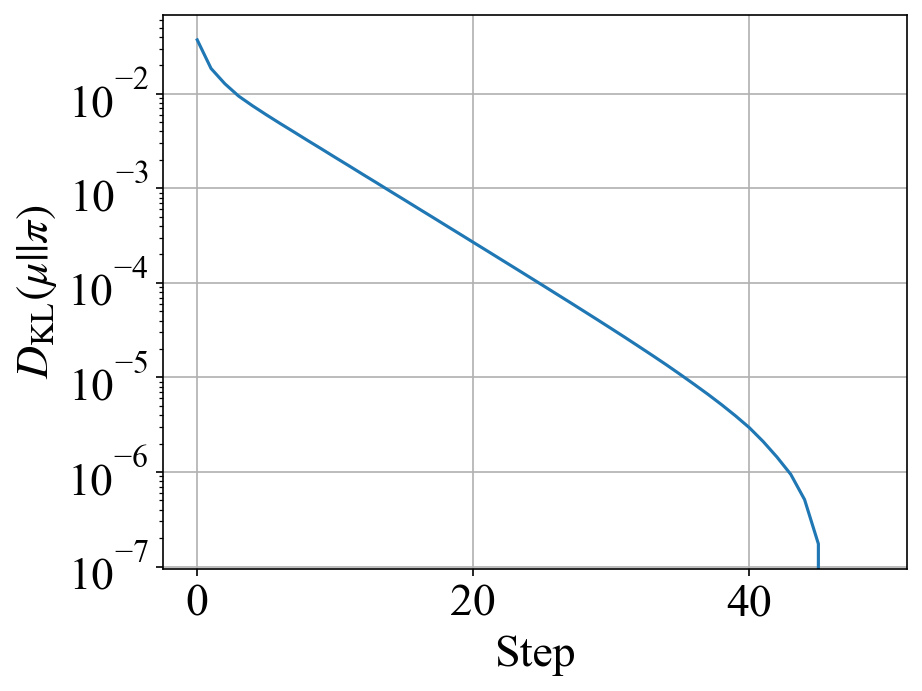

In [36]:

fig, ax = plt.subplots(dpi=150)
ax.plot(torch.arange(len(divergences)), divergences)
ax.set_yscale('log')
ax.grid()
ax.set_ylabel('$D_{\\mathrm{KL}}(\\mu||\\pi)$')
ax.set_xlabel('Step')
# ax.set_xscale('log')

tensor([[0., 0., 1.],
        [1., 0., 0.],
        [0., 1., 0.]])


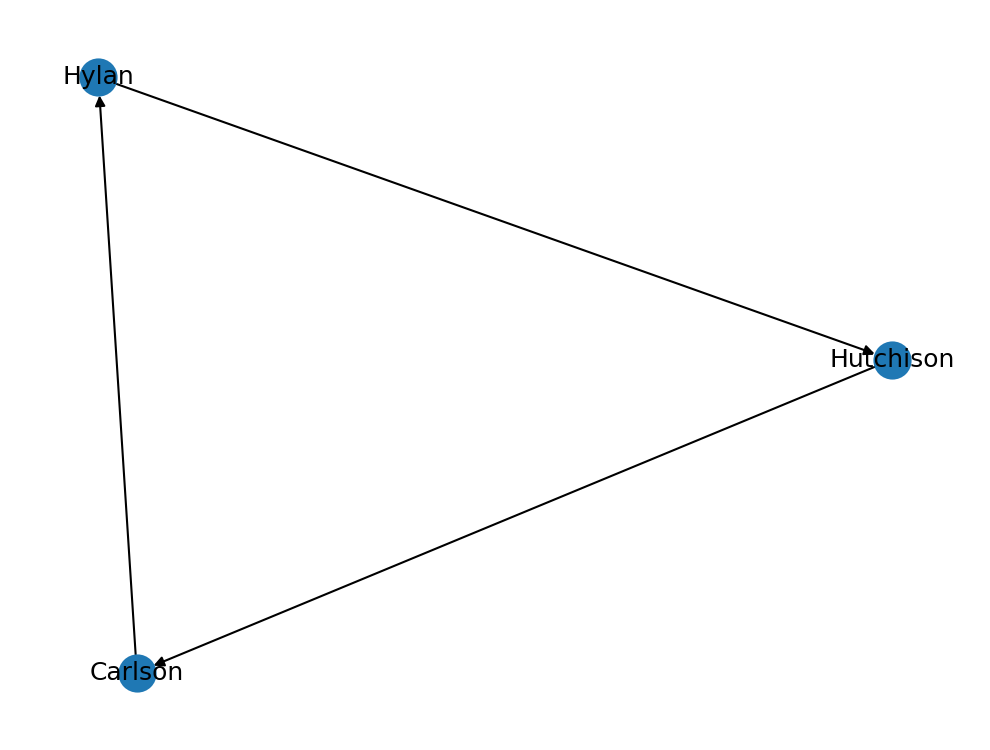

In [37]:
edges = [
    ("Hylan", "Hutchison", 1),
    ("Hutchison", "Carlson", 1),
    ("Carlson", "Hylan", 1),
]
G_periodic = nx.DiGraph()
G_periodic.add_weighted_edges_from(edges)
nx.draw(G_periodic, with_labels=True)

N = G_periodic.number_of_nodes()
T_periodic = torch.Tensor(nx.adjacency_matrix(G_periodic, nodelist=G_periodic.nodes()).toarray()).T
mu = torch.rand(N)
mu /= mu.sum()
print(T_periodic)

In [39]:
mu = torch.rand(N)
mu /= mu.sum()
for i in range(10000):
    mu = T_periodic @ mu
    print(mu)

tensor([0.2419, 0.0554, 0.7027])
tensor([0.7027, 0.2419, 0.0554])
tensor([0.0554, 0.7027, 0.2419])
tensor([0.2419, 0.0554, 0.7027])
tensor([0.7027, 0.2419, 0.0554])
tensor([0.0554, 0.7027, 0.2419])
tensor([0.2419, 0.0554, 0.7027])
tensor([0.7027, 0.2419, 0.0554])
tensor([0.0554, 0.7027, 0.2419])
tensor([0.2419, 0.0554, 0.7027])
tensor([0.7027, 0.2419, 0.0554])
tensor([0.0554, 0.7027, 0.2419])
tensor([0.2419, 0.0554, 0.7027])
tensor([0.7027, 0.2419, 0.0554])
tensor([0.0554, 0.7027, 0.2419])
tensor([0.2419, 0.0554, 0.7027])
tensor([0.7027, 0.2419, 0.0554])
tensor([0.0554, 0.7027, 0.2419])
tensor([0.2419, 0.0554, 0.7027])
tensor([0.7027, 0.2419, 0.0554])
tensor([0.0554, 0.7027, 0.2419])
tensor([0.2419, 0.0554, 0.7027])
tensor([0.7027, 0.2419, 0.0554])
tensor([0.0554, 0.7027, 0.2419])
tensor([0.2419, 0.0554, 0.7027])
tensor([0.7027, 0.2419, 0.0554])
tensor([0.0554, 0.7027, 0.2419])
tensor([0.2419, 0.0554, 0.7027])
tensor([0.7027, 0.2419, 0.0554])
tensor([0.0554, 0.7027, 0.2419])
tensor([0.

In [52]:
import numpy as np
import pandas as pd

def proposal_map(x, _lambda = None):
    row = P[:,x].numpy()
    choice = np.random.choice(row.nonzero()[0], p=row[row.nonzero()[0]])
    prob = P[choice, x]
    return choice, torch.log(prob) - torch.log(P[x][choice])

def potential(x):
    return -np.log(mu_stationary[x])

# proposal_map = lambda x: np.random.choice(torch.nonzero(P[x]).flatten(), p=np.array(P[x][torch.nonzero(P[x])].flatten())), 

def  metropolis_hastings(initial_state: torch.Tensor, proposal: callable, potential: callable, num_steps: int, temperature: float, _lambda: float = 0.01):
    samples = []
    pcurr = potential(initial_state)
    state = initial_state
    for i in range(num_steps):
        new_state, q_ratio = proposal(state, _lambda)
        pnew = potential(new_state)
        rand = np.log(np.random.rand())
        # print(q_ratio, state, new_state)
        accepted = 0
        if (pnew - pcurr + q_ratio) >= rand * temperature:
            pcurr = pnew
            state = new_state
            accepted = 1
        samples.append((i, state, pcurr, accepted))
    return samples

samples = metropolis_hastings(0, proposal_map, potential, 200000, 1.0, 1)
sample_df = pd.DataFrame(samples, columns=['Iteration', 'Sample', 'Potential', 'Accepted'])
(sample_df['Sample'].iloc[10000:].value_counts() / sample_df.iloc[10000:]['Sample'].count()).sort_index()

Sample
0    0.139537
1    0.187395
2    0.185474
3    0.219379
4    0.109468
5    0.158747
Name: count, dtype: float64

(-4.0, 2.0)

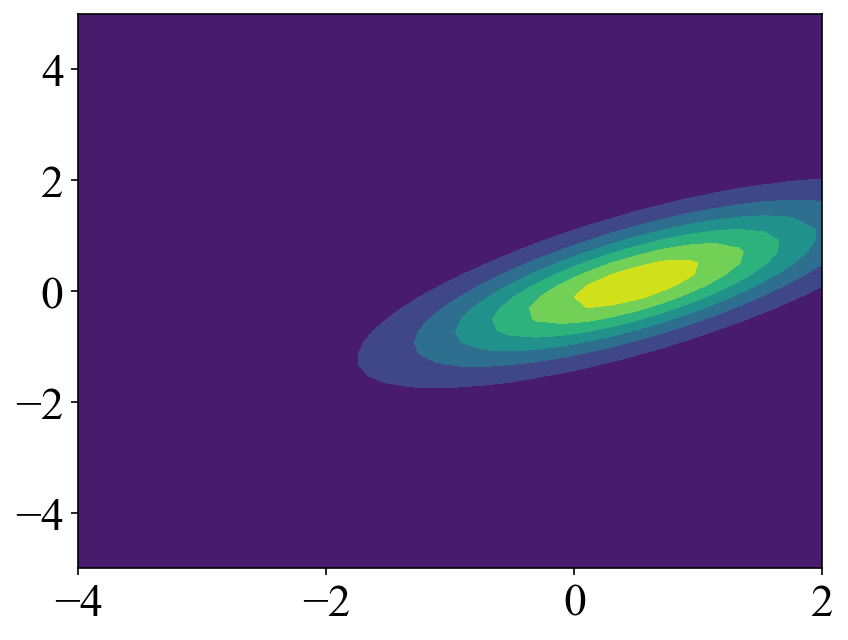

In [213]:
N = 2
mean = np.random.rand(N)
cov = np.random.rand(N, N)

cov = (cov + cov.P) / 2
FF
eigvals = np.linalg.eigvalsh(cov)
if eigvals[0] < 0:
    cov += 1.5 * np.eye(2) * np.abs(np.linalg.eigvalsh(cov)[0])
sim = np.linalg.inv(cov)
def proposal_map(x, _lambda = 0.01):
    proposal = x + np.random.randn(len(x)) * _lambda
    return proposal, 0

def potential(x):
    return -0.5 * (x - mean).P @ sim @ (x - mean)
potential = np.vectorize(potential, signature='(n)->()')
X, Y = np.meshgrid(np.linspace(-5, 5), np.linspace(-5, 5))
Z = np.exp(potential(np.stack([X, Y], axis=-1)))

fig, ax = plt.subplots()
ax.contourf(X, Y, Z)
ax.set_xlim(-4, 2)

(-5.0, 5.0)

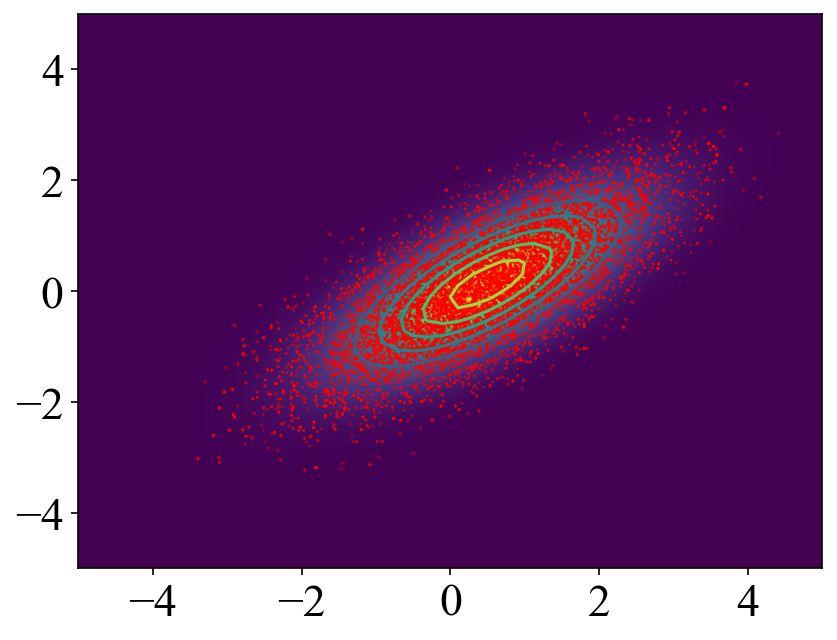

In [237]:

plt.contourf(X, Y, Z, levels=1000)
samples = metropolis_hastings(np.random.randn(N), proposal_map, potential, 20000, 1.0, 1)
xvals = []
yvals = []
for i in samples:
    x, y = i[1]
    xvals.append(x)
    yvals.append(y)

plt.contour(X, Y, Z)
ax=sns.scatterplot(x=xvals, y=yvals, color=(1, 0, 0, 0.5), s=2, edgecolor='none')
sample_df = pd.DataFrame(samples, columns=['Iteration', 'Sample', 'Potential', 'Accepted'])
sample_df['Accepted'].sum() / sample_df['Accepted'].count()
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)

In [175]:
from tqdm import tqdm
vals = []
for N in tqdm(list(np.arange(2, 100, 2))):
    for i in range(5):
        mean = np.random.rand(N)
        cov = np.random.rand(N, N)

        cov = (cov + cov.P) / 2

        eigvals = np.linalg.eigvalsh(cov)
        if eigvals[0] < 0:
            cov += 1.5 * np.eye(N) * np.abs(np.linalg.eigvalsh(cov)[0])
        eigvals = np.linalg.eigvalsh(cov)
        cov /= eigvals[0]
        sim = np.linalg.inv(cov)
        np.linalg.eigvalsh(cov)
        def proposal_map(x, _lambda):
            proposal = x + np.random.randn(len(x))
            return proposal, 0

        def potential(x):
            return -0.5 * (x - mean).P @ sim @ (x - mean)
        samples = metropolis_hastings(np.random.randn(N), proposal_map, potential, 10000, 1.0, 1)

        sample_df = pd.DataFrame(samples, columns=['Iteration', 'Sample', 'Potential', 'Accepted'])
        vals.append((N, 
                    sample_df['Accepted'].value_counts().get(1.0, 0) / 
                    sample_df['Accepted'].count()))

100%|██████████| 49/49 [00:10<00:00,  4.64it/s]


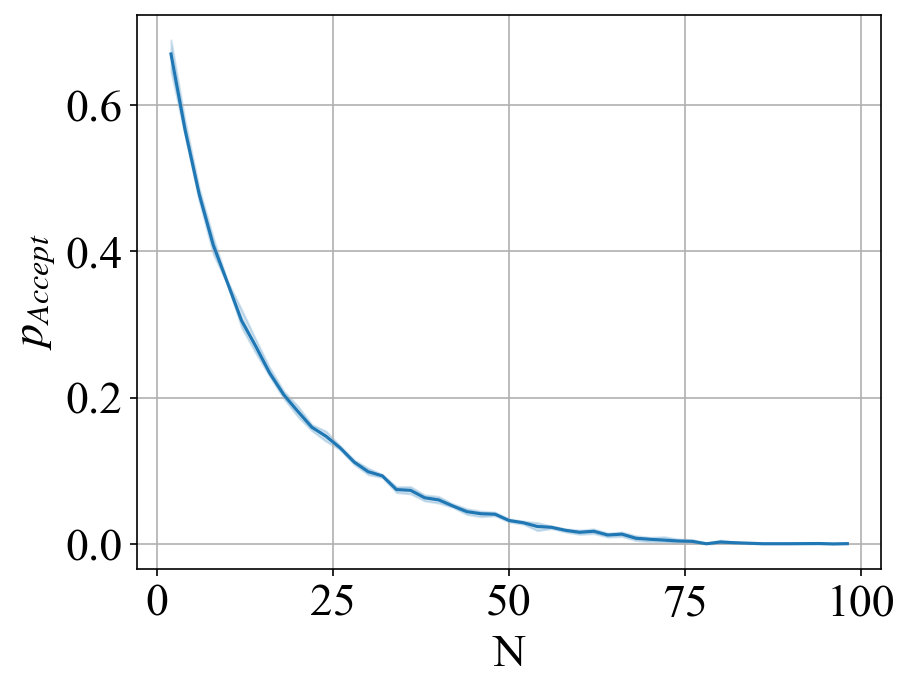

In [178]:
df = pd.DataFrame(vals, columns=['N', '$p_{Accept}$'])
ax=sns.lineplot(df, x='N', y='$p_{Accept}$')
ax.grid()



In [150]:
def gibbs(initial_state: torch.Tensor, proposal: callable, potential: callable, num_steps: int, P: float, thinning: int = 1):
    samples = []
    pcurr = potential(initial_state)
    samples.append((0, initial_state, pcurr))
    state = initial_state
    for i in range(num_steps):
        accepted = 0
        for d in range(len(state)):
            new_state, q_ratio = proposal(state, d)
            pnew = potential(new_state)
            rand = np.log(np.random.rand())
            if (pnew - pcurr + q_ratio) >= rand * P:
                pcurr = pnew
                state = new_state
                accepted += 1
        samples.append((i, state, pcurr, accepted))
    return samples

In [176]:
from tqdm import tqdm
vals_gibbs = []
for N in tqdm(list(np.arange(2, 100, 2))):
    for i in range(5):
        mean = np.random.rand(N)
        cov = np.random.rand(N, N)

        cov = (cov + cov.P) / 2

        eigvals = np.linalg.eigvalsh(cov)
        if eigvals[0] < 0:
            cov += 1.5 * np.eye(N) * np.abs(np.linalg.eigvalsh(cov)[0])
        eigvals = np.linalg.eigvalsh(cov)
        cov /= eigvals[0]
        sim = np.linalg.inv(cov)
        def proposal_map(x, d):
            proposal = x.copy()
            proposal[d] += np.random.randn()
            return proposal, 0

        def potential(x):
            return -0.5 * (x - mean).P @ sim @ (x - mean)
        samples = gibbs(np.random.randn(N), proposal_map, potential, 1000, 1.0, 1)

        sample_df = pd.DataFrame(samples, columns=['Iteration', 'Sample', 'Potential', 'Accepted'])
        vals_gibbs.append((N, 
                    sample_df['Accepted'].sum() / 
                    (N * len(sample_df))))


100%|██████████| 49/49 [00:41<00:00,  1.19it/s]


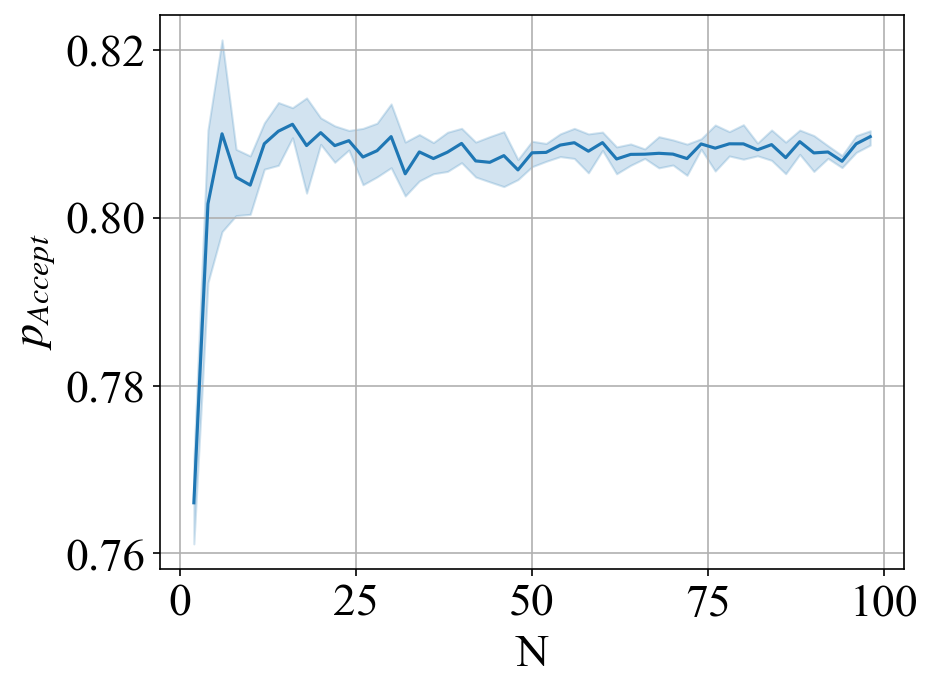

In [177]:
df = pd.DataFrame(vals_gibbs, columns=['N', '$p_{Accept}$'])
fig, ax = plt.subplots(dpi=150)
sns.lineplot(df, x='N', y='$p_{Accept}$')
ax.grid()
